# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

## Data Exploration


**TASK: Create a heatmap of the correlation between the difference frequency responses.**

<AxesSubplot:>

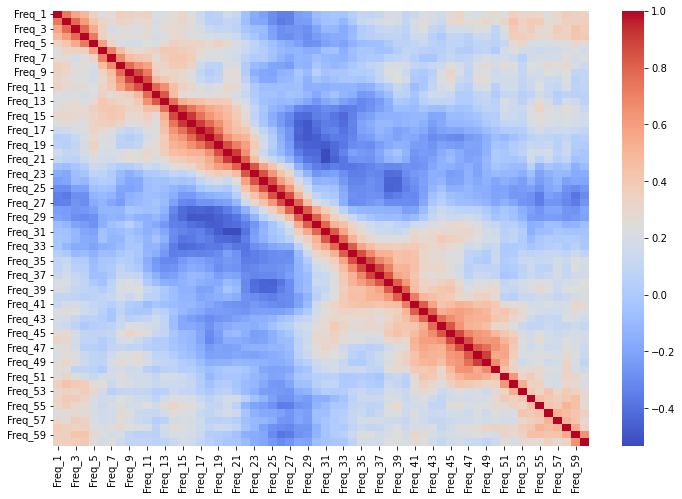

In [5]:
# CODE HERE
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [27]:
#CODE HERE
df['Target'] = df['Label'].map({'R':1, 'M':0})
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Target', 'Label'], axis = 1)
y= df['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Dokładność: 79.0%
Raport:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.83      0.74      0.78        27

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



''

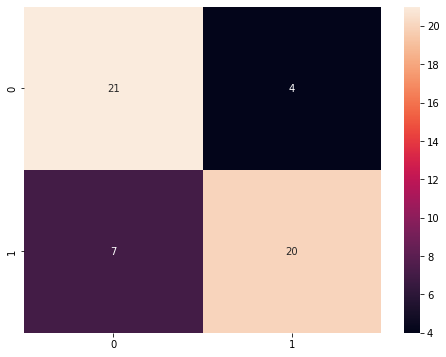

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

plt.figure(figsize = (8, 6))
model = LogisticRegression(max_iter=200, C=1)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g' )
;

In [48]:
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [0.1,0.2, 0.5, 1,2,3,4,5,6,7,8,9, 10, 100]
}

gs = GridSearchCV(SVC(), params, cv = 10)
gs.fit(X_train,y_train)
gs.best_params_

{'C': 3}

Dokładność: 87.0%
Raport:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.88      0.85      0.87        27

    accuracy                           0.87        52
   macro avg       0.87      0.87      0.87        52
weighted avg       0.87      0.87      0.87        52



''

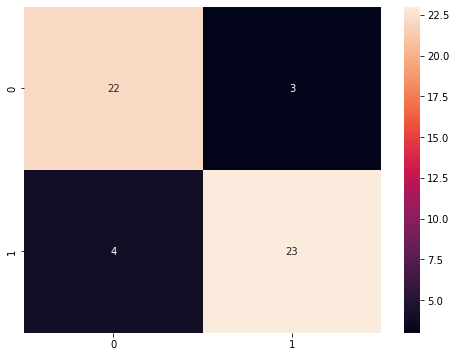

In [54]:
from sklearn.svm import SVC

plt.figure(figsize = (8, 6))
model = SVC(C= 1)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;

Dokładność: 60.0%
Raport:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49        25
           1       0.58      0.78      0.67        27

    accuracy                           0.60        52
   macro avg       0.60      0.59      0.58        52
weighted avg       0.60      0.60      0.58        52



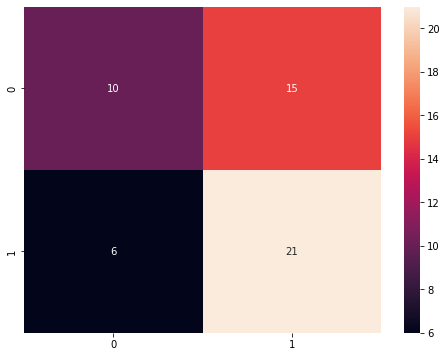

In [35]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
plt.figure(figsize = (8, 6))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

Dokładność: 83.0%
Raport:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        25
           1       1.00      0.67      0.80        27

    accuracy                           0.83        52
   macro avg       0.87      0.83      0.82        52
weighted avg       0.87      0.83      0.82        52



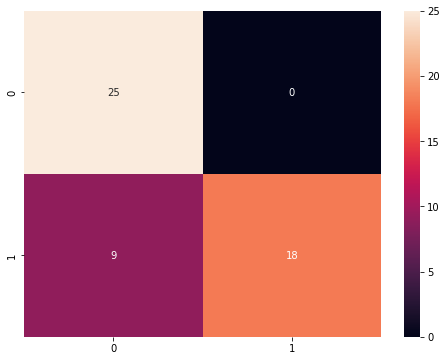

In [57]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize = (8, 6))
model = RandomForestClassifier(max_depth=4, max_leaf_nodes=5)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

Dokładność: 88.0%
Raport:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.89      0.89      0.89        27

    accuracy                           0.88        52
   macro avg       0.88      0.88      0.88        52
weighted avg       0.88      0.88      0.88        52



''

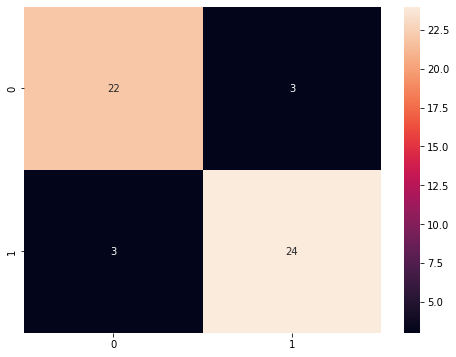

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

plt.figure(figsize = (8,6))
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;

Dokładność: 87.0%
Raport:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.95      0.78      0.86        27

    accuracy                           0.87        52
   macro avg       0.88      0.87      0.86        52
weighted avg       0.88      0.87      0.86        52



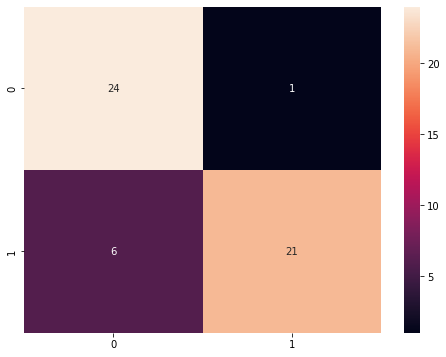

In [68]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(n_estimators = 70, max_depth = 4, max_leaves = 4)
plt.figure(figsize = (8,6))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');